In [1]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CSE512/HW3'

Mounted at /content/gdrive
/content/gdrive/My Drive/CSE512/HW3


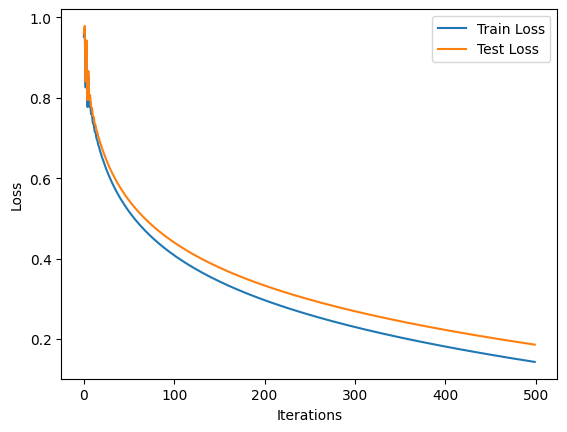

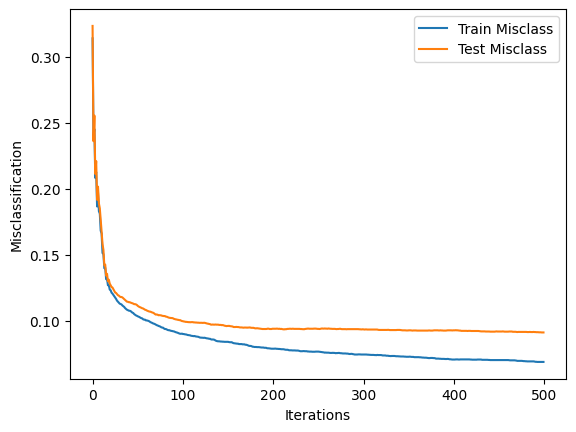

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import OneHotEncoder

data = sio.loadmat('mnist.mat')
Xtrain, Xtest = data['trainX'].astype(float)[:10000,:], data['testX'].astype(float)
ytrain, ytest = data['trainY'][0][:10000], data['testY'][0]
ytrain_onehot = OneHotEncoder(categories='auto').fit_transform(ytrain.reshape(-1, 1))
m, n = Xtrain.shape

def compute_gradient(X, y, theta):
    s = np.dot(X, theta)
    exp_s = np.exp(s)
    gradient = exp_s.T / np.sum(exp_s, axis=1)
    return np.dot(X.T, (gradient.T - y)) / m

def compute_loss(X, y, theta):
    s = np.dot(X, theta)
    exp_s = np.exp(s)
    gradient = exp_s.T / np.sum(exp_s, axis=1)
    return np.mean(np.log(np.abs(gradient - y)))

def accuracy(X, y, theta):
    preds = np.argmax(np.dot(X,theta), axis=1)
    return np.mean(preds == y)

stepsize = 1e-5
Theta = np.zeros((n, 10))
train_loss, test_loss, train_misclass, test_misclass = [], [], [], []
for _ in range(500):
    Theta -= stepsize * compute_gradient(Xtrain, ytrain_onehot, Theta)
    train_loss.append(compute_loss(Xtrain, ytrain, Theta))
    test_loss.append(compute_loss(Xtest, ytest, Theta))
    train_misclass.append(1 - accuracy(Xtrain, ytrain, Theta))
    test_misclass.append(1 - accuracy(Xtest, ytest, Theta))

train_loss, test_loss = np.array(train_loss), np.array(test_loss)
train_misclass, test_misclass = np.array(train_misclass), np.array(test_misclass)
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(train_misclass, label="Train Misclass")
plt.plot(test_misclass, label="Test Misclass")
plt.xlabel('Iterations')
plt.ylabel('Misclassification')
plt.legend()
plt.show()

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


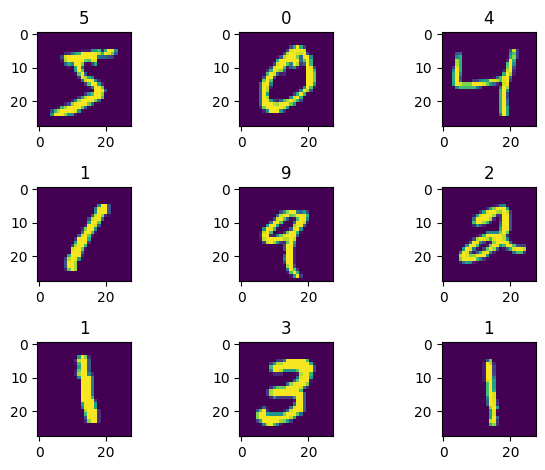

In [ ]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [ ]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [ ]:
def getLossFunction(theta):
    s = np.matmul(theta, (ytrain * Xtrain.T))
    sigmas = 1 / (1 + np.exp(-s))
    return -np.mean(np.log(sigmas))

def getGradient(theta):
    s = np.matmul(theta, (ytrain * Xtrain.T))
    sigmas = 1 / (1 + np.exp(s))
    return -np.dot(ytrain * Xtrain.T, sigmas)/m

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))


Check number:  45.19215648734921 12343.176947604472


In [ ]:
def getAccuracy(theta, X, y):
    ypre = np.sign(np.dot(theta, X.T))
    return np.mean(ypre == y)

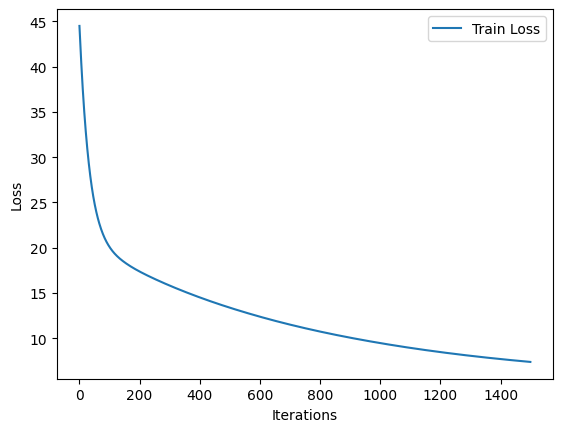

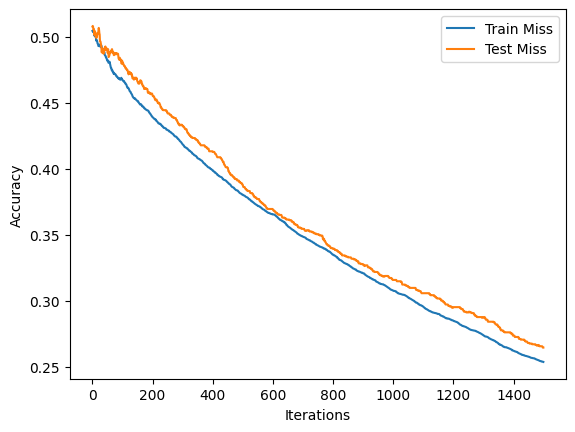

Final train accuracy:  0.7461623271987109
Final test accuracy:  0.7353088900050226


In [ ]:
train_loss = []
train_miss = []
test_miss = []
theta = np.linspace(-.1,.1,n)
for i in range(1500):
    theta -= 1e-6 * getGradient(theta)
    train_loss.append(getLossFunction(theta))
    train_miss.append(1-getAccuracy(theta, Xtrain, ytrain))
    test_miss.append(1-getAccuracy(theta, Xtest, ytest))

plt.plot(train_loss, label="Train Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(train_miss, label="Train Miss")
plt.plot(test_miss, label="Test Miss")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print('Final train accuracy: ', getAccuracy(theta, Xtrain, ytrain))
print('Final test accuracy: ', getAccuracy(theta, Xtest, ytest))

In [ ]:
def getStochGradient(theta, minibatch):
    s = np.matmul(theta, (ytrain[minibatch] * Xtrain[minibatch].T))
    sigmas = 1 / (1 + np.exp(s))
    return -np.matmul(Xtrain[minibatch].T, (ytrain[minibatch] * sigmas)) / len(minibatch)

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))

Check number:  5803.5


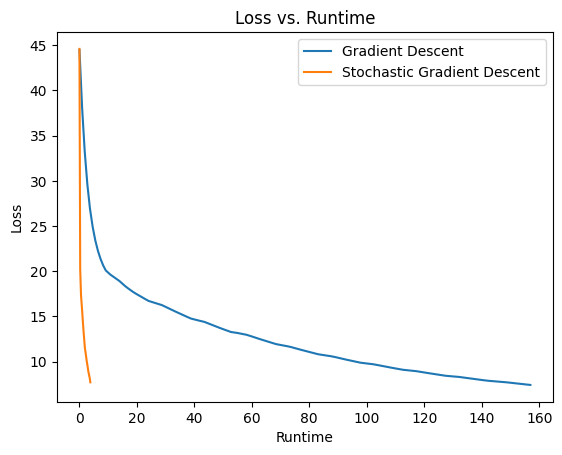

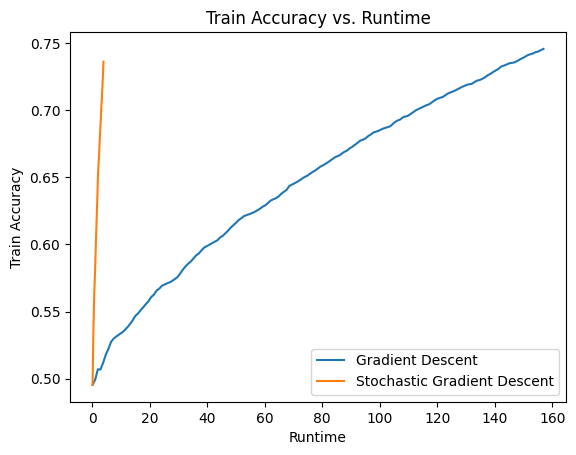

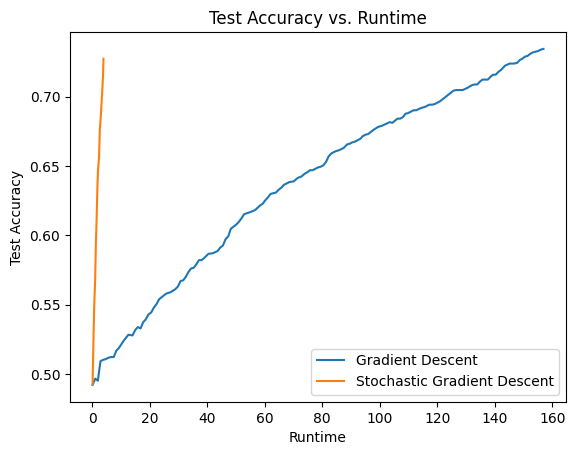

In [ ]:
gd_loss, gd_train_acc, gd_test_acc, gd_time = [], [], [], []
sgd_loss, sgd_train_acc, sgd_test_acc, sgd_time = [], [], [], []

theta = np.linspace(-.1,.1,n)
gd_start = time()
for i in range(1500):
    theta -= 1e-6 * getGradient(theta)
    if i % 10 == 0:
        gd_loss.append(getLossFunction(theta))
        gd_train_acc.append(getAccuracy(theta, Xtrain, ytrain))
        gd_test_acc.append(getAccuracy(theta, Xtest, ytest))
        gd_time.append(time() - gd_start)

theta = np.linspace(-.1,.1,n)
sgd_start = time()
for i in range(1500):
    if i % (m // 50) == 0:
        perm = np.random.permutation(m)
        Xtrain, ytrain = Xtrain[perm], ytrain[perm]
    theta -= 1e-6 * getStochGradient(theta, np.random.choice(m, 50, replace=False))
    if i % 100 == 0:
        sgd_loss.append(getLossFunction(theta))
        sgd_train_acc.append(getAccuracy(theta, Xtrain, ytrain))
        sgd_test_acc.append(getAccuracy(theta, Xtest, ytest))
        sgd_time.append(time() - sgd_start)

plt.plot(gd_time, gd_loss, label="Gradient Descent")
plt.plot(sgd_time, sgd_loss, label="Stochastic Gradient Descent")
plt.xlabel("Runtime")
plt.ylabel("Loss")
plt.title("Loss vs. Runtime")
plt.legend()
plt.show()

plt.plot(gd_time, gd_train_acc, label="Gradient Descent")
plt.plot(sgd_time, sgd_train_acc, label="Stochastic Gradient Descent")
plt.xlabel("Runtime")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs. Runtime")
plt.legend()
plt.show()

plt.plot(gd_time, gd_test_acc, label="Gradient Descent")
plt.plot(sgd_time, sgd_test_acc, label="Stochastic Gradient Descent")
plt.xlabel("Runtime")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Runtime")
plt.legend()
plt.show()

In [ ]:
#you can use time() to measure runtime of things.
#sample runtime code:

def do_stuff_takes_nseconds(n):
    wait(n)
start = time()
do_stuff_takes_nseconds(n)
print(time()-start, ' seconds to run code')